In [103]:
import numpy as np
import pandas as pd
import re
from pathlib import Path
import math
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from shapely import wkt

# Investigating demographic variable in the census data (education).

1. Read the Education Demographics Data 

In [104]:
education_demo = pd.read_csv('../../data/clean/education_demographics.csv')
education_demo.head(1)

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),population 25 years and over,population 25 years and over: less than high school,population 25 years and over: high school graduate or more (includes equivalency),population 25 years and over: some college or more,population 25 years and over: bachelor's degree or more,population 25 years and over: master's degree or more,population 25 years and over: professional school degree or more,population 25 years and over: doctorate degree,geometry
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,2783,220,2563,1551,586,201,0,0,"POLYGON ((-87.720963 41.683952, -87.720304 41...."


In [105]:
population_demo = pd.read_csv('../../data/clean/population_demographics.csv')
population_demo.head(1)

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),total population,population density (per sq. mile),total population: male,total population: female,total: under 5 years,total: 5 to 9 years,...,total population: female: 75 to 84 years,total population: female: 85 years and over,total population: white alone,total population: black or african american alone,total population: american indian and alaska native alone,total population: asian alone,total population: native hawaiian and other pacific islander alone,total population: some other race alone,total population: two or more races,geometry
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,4059,5233.042,1883,2176,191,402,...,160,26,3230,317,40,0,0,296,176,"POLYGON ((-87.720963 41.683952, -87.720304 41...."


In [106]:
new_education = education_demo.copy(deep=True)
new_education['Percent of people with less than high school'] = new_education['population 25 years and over: less than high school'] / new_education['population 25 years and over']
new_education

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),population 25 years and over,population 25 years and over: less than high school,population 25 years and over: high school graduate or more (includes equivalency),population 25 years and over: some college or more,population 25 years and over: bachelor's degree or more,population 25 years and over: master's degree or more,population 25 years and over: professional school degree or more,population 25 years and over: doctorate degree,geometry,Percent of people with less than high school
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,2783,220,2563,1551,586,201,0,0,"POLYGON ((-87.720963 41.683952, -87.720304 41....",0.079051
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,4211,459,3752,2365,778,213,129,0,MULTIPOLYGON (((-87.72003618903081 41.68396731...,0.109000
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,3110,69,3041,2191,1052,359,42,20,"POLYGON ((-87.72008 41.691274, -87.719372 41.6...",0.022186
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,3597,213,3384,2804,1644,768,52,22,"POLYGON ((-87.720431 41.698569, -87.720066 41....",0.059216
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,2436,191,2245,1818,1096,385,51,41,"MULTIPOLYGON (((-87.720752 41.702042, -87.7207...",0.078407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,17031320400,"Census Tract 3204, Cook County, Illinois",804124,649677,1122,9,1113,1113,1058,685,375,113,"POLYGON ((-87.627636 41.882057, -87.627594 41....",0.008021
865,17031320101,"Census Tract 3201.01, Cook County, Illinois",465726,25911,6978,246,6732,6519,5835,3672,1244,636,"POLYGON ((-87.620855 41.881881, -87.620825 41....",0.035254
866,17031081403,"Census Tract 814.03, Cook County, Illinois",331289,1429583,7678,32,7646,7525,7036,3664,1746,280,"MULTIPOLYGON (((-87.624311 41.889115, -87.6243...",0.004168
867,17031081402,"Census Tract 814.02, Cook County, Illinois",589626,0,4641,99,4542,4364,3994,2519,1388,385,"POLYGON ((-87.617537 41.893453, -87.617164 41....",0.021332


Text(0.5, 1.0, 'Percent of People with less than high school ')

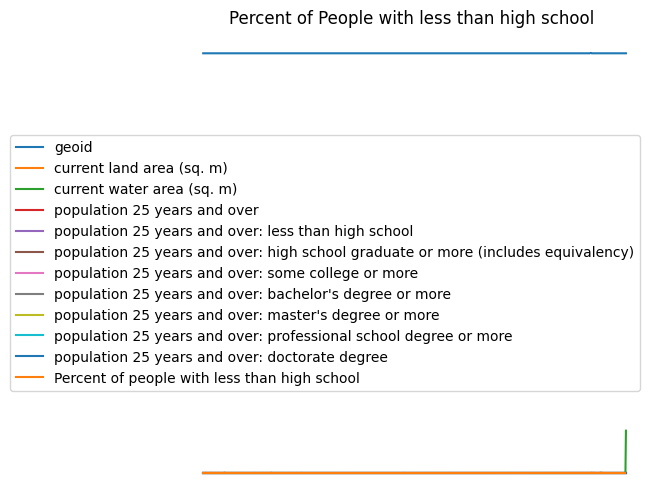

In [107]:
from shapely import wkt
#Converting df to gdf
#new_education['geometry'] = new_education['geometry'].apply(wkt.loads)
#new_education = gpd.GeoDataFrame(new_education, crs="EPSG:4326", geometry=new_education['geometry'])




fig, ax = plt.subplots(1, figsize=(6,6))
new_education.plot(column = 'Percent of people with less than high school', legend = True, ax=ax)
ax.axis('off')
ax.set_title('Percent of People with less than high school ', fontdict ={'fontsize': '12', 'fontweight' : '3'})

In [108]:
new_education['Percent of people with High School Degrees'] = new_education['population 25 years and over: high school graduate or more (includes equivalency)'] / new_education['population 25 years and over']
new_education.head(3)

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),population 25 years and over,population 25 years and over: less than high school,population 25 years and over: high school graduate or more (includes equivalency),population 25 years and over: some college or more,population 25 years and over: bachelor's degree or more,population 25 years and over: master's degree or more,population 25 years and over: professional school degree or more,population 25 years and over: doctorate degree,geometry,Percent of people with less than high school,Percent of people with High School Degrees
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,2783,220,2563,1551,586,201,0,0,"POLYGON ((-87.720963 41.683952, -87.720304 41....",0.079051,0.920949
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,4211,459,3752,2365,778,213,129,0,MULTIPOLYGON (((-87.72003618903081 41.68396731...,0.109000,0.891000
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,3110,69,3041,2191,1052,359,42,20,"POLYGON ((-87.72008 41.691274, -87.719372 41.6...",0.022186,0.977814


Text(0.5, 1.0, 'Percent of People with High School Degrees')

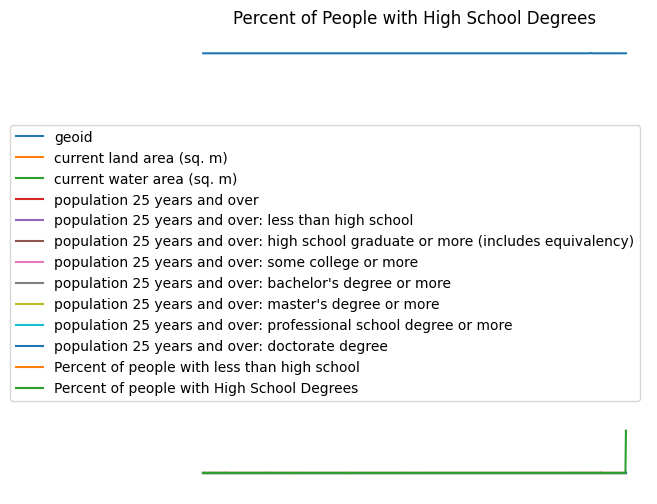

In [109]:
from shapely import wkt
#Converting df to gdf
#new_education['geometry'] = new_education['geometry'].apply(wkt.loads)
#new_education = gpd.GeoDataFrame(new_education, crs="EPSG:4326", geometry=new_education['geometry'])




fig, ax = plt.subplots(1, figsize=(6,6))
new_education.plot(column = 'Percent of people with High School Degrees', legend = True, ax=ax)
ax.axis('off')
ax.set_title('Percent of People with High School Degrees', fontdict ={'fontsize': '12', 'fontweight' : '3'})

In [110]:
new_education['percent of people with some college '] = new_education['population 25 years and over: some college or more'] / new_education['population 25 years and over']
new_education

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),population 25 years and over,population 25 years and over: less than high school,population 25 years and over: high school graduate or more (includes equivalency),population 25 years and over: some college or more,population 25 years and over: bachelor's degree or more,population 25 years and over: master's degree or more,population 25 years and over: professional school degree or more,population 25 years and over: doctorate degree,geometry,Percent of people with less than high school,Percent of people with High School Degrees,percent of people with some college
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,2783,220,2563,1551,586,201,0,0,"POLYGON ((-87.720963 41.683952, -87.720304 41....",0.079051,0.920949,0.557312
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,4211,459,3752,2365,778,213,129,0,MULTIPOLYGON (((-87.72003618903081 41.68396731...,0.109000,0.891000,0.561624
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,3110,69,3041,2191,1052,359,42,20,"POLYGON ((-87.72008 41.691274, -87.719372 41.6...",0.022186,0.977814,0.704502
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,3597,213,3384,2804,1644,768,52,22,"POLYGON ((-87.720431 41.698569, -87.720066 41....",0.059216,0.940784,0.779539
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,2436,191,2245,1818,1096,385,51,41,"MULTIPOLYGON (((-87.720752 41.702042, -87.7207...",0.078407,0.921593,0.746305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,17031320400,"Census Tract 3204, Cook County, Illinois",804124,649677,1122,9,1113,1113,1058,685,375,113,"POLYGON ((-87.627636 41.882057, -87.627594 41....",0.008021,0.991979,0.991979
865,17031320101,"Census Tract 3201.01, Cook County, Illinois",465726,25911,6978,246,6732,6519,5835,3672,1244,636,"POLYGON ((-87.620855 41.881881, -87.620825 41....",0.035254,0.964746,0.934222
866,17031081403,"Census Tract 814.03, Cook County, Illinois",331289,1429583,7678,32,7646,7525,7036,3664,1746,280,"MULTIPOLYGON (((-87.624311 41.889115, -87.6243...",0.004168,0.995832,0.980073
867,17031081402,"Census Tract 814.02, Cook County, Illinois",589626,0,4641,99,4542,4364,3994,2519,1388,385,"POLYGON ((-87.617537 41.893453, -87.617164 41....",0.021332,0.978668,0.940315


In [111]:
new_education['percent of people with bachelor\'s degree '] = new_education['population 25 years and over: bachelor\'s degree or more'] / new_education['population 25 years and over']
new_education

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),population 25 years and over,population 25 years and over: less than high school,population 25 years and over: high school graduate or more (includes equivalency),population 25 years and over: some college or more,population 25 years and over: bachelor's degree or more,population 25 years and over: master's degree or more,population 25 years and over: professional school degree or more,population 25 years and over: doctorate degree,geometry,Percent of people with less than high school,Percent of people with High School Degrees,percent of people with some college,percent of people with bachelor's degree
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,2783,220,2563,1551,586,201,0,0,"POLYGON ((-87.720963 41.683952, -87.720304 41....",0.079051,0.920949,0.557312,0.210564
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,4211,459,3752,2365,778,213,129,0,MULTIPOLYGON (((-87.72003618903081 41.68396731...,0.109000,0.891000,0.561624,0.184754
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,3110,69,3041,2191,1052,359,42,20,"POLYGON ((-87.72008 41.691274, -87.719372 41.6...",0.022186,0.977814,0.704502,0.338264
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,3597,213,3384,2804,1644,768,52,22,"POLYGON ((-87.720431 41.698569, -87.720066 41....",0.059216,0.940784,0.779539,0.457048
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,2436,191,2245,1818,1096,385,51,41,"MULTIPOLYGON (((-87.720752 41.702042, -87.7207...",0.078407,0.921593,0.746305,0.449918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,17031320400,"Census Tract 3204, Cook County, Illinois",804124,649677,1122,9,1113,1113,1058,685,375,113,"POLYGON ((-87.627636 41.882057, -87.627594 41....",0.008021,0.991979,0.991979,0.942959
865,17031320101,"Census Tract 3201.01, Cook County, Illinois",465726,25911,6978,246,6732,6519,5835,3672,1244,636,"POLYGON ((-87.620855 41.881881, -87.620825 41....",0.035254,0.964746,0.934222,0.836199
866,17031081403,"Census Tract 814.03, Cook County, Illinois",331289,1429583,7678,32,7646,7525,7036,3664,1746,280,"MULTIPOLYGON (((-87.624311 41.889115, -87.6243...",0.004168,0.995832,0.980073,0.916384
867,17031081402,"Census Tract 814.02, Cook County, Illinois",589626,0,4641,99,4542,4364,3994,2519,1388,385,"POLYGON ((-87.617537 41.893453, -87.617164 41....",0.021332,0.978668,0.940315,0.860590


In [112]:
new_education['percent of people with bachelor\'s degree '] = new_education['population 25 years and over: bachelor\'s degree or more'] / new_education['population 25 years and over']
new_education

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),population 25 years and over,population 25 years and over: less than high school,population 25 years and over: high school graduate or more (includes equivalency),population 25 years and over: some college or more,population 25 years and over: bachelor's degree or more,population 25 years and over: master's degree or more,population 25 years and over: professional school degree or more,population 25 years and over: doctorate degree,geometry,Percent of people with less than high school,Percent of people with High School Degrees,percent of people with some college,percent of people with bachelor's degree
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,2783,220,2563,1551,586,201,0,0,"POLYGON ((-87.720963 41.683952, -87.720304 41....",0.079051,0.920949,0.557312,0.210564
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,4211,459,3752,2365,778,213,129,0,MULTIPOLYGON (((-87.72003618903081 41.68396731...,0.109000,0.891000,0.561624,0.184754
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,3110,69,3041,2191,1052,359,42,20,"POLYGON ((-87.72008 41.691274, -87.719372 41.6...",0.022186,0.977814,0.704502,0.338264
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,3597,213,3384,2804,1644,768,52,22,"POLYGON ((-87.720431 41.698569, -87.720066 41....",0.059216,0.940784,0.779539,0.457048
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,2436,191,2245,1818,1096,385,51,41,"MULTIPOLYGON (((-87.720752 41.702042, -87.7207...",0.078407,0.921593,0.746305,0.449918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,17031320400,"Census Tract 3204, Cook County, Illinois",804124,649677,1122,9,1113,1113,1058,685,375,113,"POLYGON ((-87.627636 41.882057, -87.627594 41....",0.008021,0.991979,0.991979,0.942959
865,17031320101,"Census Tract 3201.01, Cook County, Illinois",465726,25911,6978,246,6732,6519,5835,3672,1244,636,"POLYGON ((-87.620855 41.881881, -87.620825 41....",0.035254,0.964746,0.934222,0.836199
866,17031081403,"Census Tract 814.03, Cook County, Illinois",331289,1429583,7678,32,7646,7525,7036,3664,1746,280,"MULTIPOLYGON (((-87.624311 41.889115, -87.6243...",0.004168,0.995832,0.980073,0.916384
867,17031081402,"Census Tract 814.02, Cook County, Illinois",589626,0,4641,99,4542,4364,3994,2519,1388,385,"POLYGON ((-87.617537 41.893453, -87.617164 41....",0.021332,0.978668,0.940315,0.860590


In [113]:
new_education['percent of people with master\'s degree '] = new_education['population 25 years and over: master\'s degree or more'] / new_education['population 25 years and over']
new_education

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),population 25 years and over,population 25 years and over: less than high school,population 25 years and over: high school graduate or more (includes equivalency),population 25 years and over: some college or more,population 25 years and over: bachelor's degree or more,population 25 years and over: master's degree or more,population 25 years and over: professional school degree or more,population 25 years and over: doctorate degree,geometry,Percent of people with less than high school,Percent of people with High School Degrees,percent of people with some college,percent of people with bachelor's degree,percent of people with master's degree
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,2783,220,2563,1551,586,201,0,0,"POLYGON ((-87.720963 41.683952, -87.720304 41....",0.079051,0.920949,0.557312,0.210564,0.072224
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,4211,459,3752,2365,778,213,129,0,MULTIPOLYGON (((-87.72003618903081 41.68396731...,0.109000,0.891000,0.561624,0.184754,0.050582
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,3110,69,3041,2191,1052,359,42,20,"POLYGON ((-87.72008 41.691274, -87.719372 41.6...",0.022186,0.977814,0.704502,0.338264,0.115434
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,3597,213,3384,2804,1644,768,52,22,"POLYGON ((-87.720431 41.698569, -87.720066 41....",0.059216,0.940784,0.779539,0.457048,0.213511
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,2436,191,2245,1818,1096,385,51,41,"MULTIPOLYGON (((-87.720752 41.702042, -87.7207...",0.078407,0.921593,0.746305,0.449918,0.158046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,17031320400,"Census Tract 3204, Cook County, Illinois",804124,649677,1122,9,1113,1113,1058,685,375,113,"POLYGON ((-87.627636 41.882057, -87.627594 41....",0.008021,0.991979,0.991979,0.942959,0.610517
865,17031320101,"Census Tract 3201.01, Cook County, Illinois",465726,25911,6978,246,6732,6519,5835,3672,1244,636,"POLYGON ((-87.620855 41.881881, -87.620825 41....",0.035254,0.964746,0.934222,0.836199,0.526225
866,17031081403,"Census Tract 814.03, Cook County, Illinois",331289,1429583,7678,32,7646,7525,7036,3664,1746,280,"MULTIPOLYGON (((-87.624311 41.889115, -87.6243...",0.004168,0.995832,0.980073,0.916384,0.477208
867,17031081402,"Census Tract 814.02, Cook County, Illinois",589626,0,4641,99,4542,4364,3994,2519,1388,385,"POLYGON ((-87.617537 41.893453, -87.617164 41....",0.021332,0.978668,0.940315,0.860590,0.542771


In [114]:
new_education['percent of people with professional school degree'] = new_education['population 25 years and over: professional school degree or more'] / new_education['population 25 years and over']
new_education

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),population 25 years and over,population 25 years and over: less than high school,population 25 years and over: high school graduate or more (includes equivalency),population 25 years and over: some college or more,population 25 years and over: bachelor's degree or more,population 25 years and over: master's degree or more,population 25 years and over: professional school degree or more,population 25 years and over: doctorate degree,geometry,Percent of people with less than high school,Percent of people with High School Degrees,percent of people with some college,percent of people with bachelor's degree,percent of people with master's degree,percent of people with professional school degree
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,2783,220,2563,1551,586,201,0,0,"POLYGON ((-87.720963 41.683952, -87.720304 41....",0.079051,0.920949,0.557312,0.210564,0.072224,0.000000
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,4211,459,3752,2365,778,213,129,0,MULTIPOLYGON (((-87.72003618903081 41.68396731...,0.109000,0.891000,0.561624,0.184754,0.050582,0.030634
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,3110,69,3041,2191,1052,359,42,20,"POLYGON ((-87.72008 41.691274, -87.719372 41.6...",0.022186,0.977814,0.704502,0.338264,0.115434,0.013505
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,3597,213,3384,2804,1644,768,52,22,"POLYGON ((-87.720431 41.698569, -87.720066 41....",0.059216,0.940784,0.779539,0.457048,0.213511,0.014456
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,2436,191,2245,1818,1096,385,51,41,"MULTIPOLYGON (((-87.720752 41.702042, -87.7207...",0.078407,0.921593,0.746305,0.449918,0.158046,0.020936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,17031320400,"Census Tract 3204, Cook County, Illinois",804124,649677,1122,9,1113,1113,1058,685,375,113,"POLYGON ((-87.627636 41.882057, -87.627594 41....",0.008021,0.991979,0.991979,0.942959,0.610517,0.334225
865,17031320101,"Census Tract 3201.01, Cook County, Illinois",465726,25911,6978,246,6732,6519,5835,3672,1244,636,"POLYGON ((-87.620855 41.881881, -87.620825 41....",0.035254,0.964746,0.934222,0.836199,0.526225,0.178275
866,17031081403,"Census Tract 814.03, Cook County, Illinois",331289,1429583,7678,32,7646,7525,7036,3664,1746,280,"MULTIPOLYGON (((-87.624311 41.889115, -87.6243...",0.004168,0.995832,0.980073,0.916384,0.477208,0.227403
867,17031081402,"Census Tract 814.02, Cook County, Illinois",589626,0,4641,99,4542,4364,3994,2519,1388,385,"POLYGON ((-87.617537 41.893453, -87.617164 41....",0.021332,0.978668,0.940315,0.860590,0.542771,0.299073


In [127]:
new_education['percent of people with doctorate degree'] = new_education['population 25 years and over: doctorate degree'] / new_education['population 25 years and over']
new_education

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),population 25 years and over,population 25 years and over: less than high school,population 25 years and over: high school graduate or more (includes equivalency),population 25 years and over: some college or more,population 25 years and over: bachelor's degree or more,population 25 years and over: master's degree or more,population 25 years and over: professional school degree or more,population 25 years and over: doctorate degree,geometry,Percent of people with less than high school,Percent of people with High School Degrees,percent of people with some college,percent of people with bachelor's degree,percent of people with master's degree,percent of people with professional school degree,percent of people with doctorate degree
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,2783,220,2563,1551,586,201,0,0,"POLYGON ((-87.720963 41.683952, -87.720304 41....",0.079051,0.920949,0.557312,0.210564,0.072224,0.000000,0.000000
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,4211,459,3752,2365,778,213,129,0,MULTIPOLYGON (((-87.72003618903081 41.68396731...,0.109000,0.891000,0.561624,0.184754,0.050582,0.030634,0.000000
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,3110,69,3041,2191,1052,359,42,20,"POLYGON ((-87.72008 41.691274, -87.719372 41.6...",0.022186,0.977814,0.704502,0.338264,0.115434,0.013505,0.006431
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,3597,213,3384,2804,1644,768,52,22,"POLYGON ((-87.720431 41.698569, -87.720066 41....",0.059216,0.940784,0.779539,0.457048,0.213511,0.014456,0.006116
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,2436,191,2245,1818,1096,385,51,41,"MULTIPOLYGON (((-87.720752 41.702042, -87.7207...",0.078407,0.921593,0.746305,0.449918,0.158046,0.020936,0.016831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,17031320400,"Census Tract 3204, Cook County, Illinois",804124,649677,1122,9,1113,1113,1058,685,375,113,"POLYGON ((-87.627636 41.882057, -87.627594 41....",0.008021,0.991979,0.991979,0.942959,0.610517,0.334225,0.100713
865,17031320101,"Census Tract 3201.01, Cook County, Illinois",465726,25911,6978,246,6732,6519,5835,3672,1244,636,"POLYGON ((-87.620855 41.881881, -87.620825 41....",0.035254,0.964746,0.934222,0.836199,0.526225,0.178275,0.091144
866,17031081403,"Census Tract 814.03, Cook County, Illinois",331289,1429583,7678,32,7646,7525,7036,3664,1746,280,"MULTIPOLYGON (((-87.624311 41.889115, -87.6243...",0.004168,0.995832,0.980073,0.916384,0.477208,0.227403,0.036468
867,17031081402,"Census Tract 814.02, Cook County, Illinois",589626,0,4641,99,4542,4364,3994,2519,1388,385,"POLYGON ((-87.617537 41.893453, -87.617164 41....",0.021332,0.978668,0.940315,0.860590,0.542771,0.299073,0.082956


In [128]:
new_education.rename(columns={"population 25 years and over: less than high school": "less than high school",
                              "population 25 years and over: high school graduate or more (includes equivalency)": "high school graduate or more",
                              "population 25 years and over: some college or more": "some college or more",
                              "population 25 years and over: bachelor's degree or more":"bachelor's degree or more",
                              "population 25 years and over: master's degree or more": "master's degree or more",
                              "population 25 years and over: professional school degree or more": "professional school degree or more",
                             "ppopulation 25 years and over: doctorate degree": "doctorate degree"})

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),population 25 years and over,less than high school,high school graduate or more,some college or more,bachelor's degree or more,master's degree or more,professional school degree or more,population 25 years and over: doctorate degree,geometry,Percent of people with less than high school,Percent of people with High School Degrees,percent of people with some college,percent of people with bachelor's degree,percent of people with master's degree,percent of people with professional school degree,percent of people with doctorate degree
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,2783,220,2563,1551,586,201,0,0,"POLYGON ((-87.720963 41.683952, -87.720304 41....",0.079051,0.920949,0.557312,0.210564,0.072224,0.000000,0.000000
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,4211,459,3752,2365,778,213,129,0,MULTIPOLYGON (((-87.72003618903081 41.68396731...,0.109000,0.891000,0.561624,0.184754,0.050582,0.030634,0.000000
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,3110,69,3041,2191,1052,359,42,20,"POLYGON ((-87.72008 41.691274, -87.719372 41.6...",0.022186,0.977814,0.704502,0.338264,0.115434,0.013505,0.006431
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,3597,213,3384,2804,1644,768,52,22,"POLYGON ((-87.720431 41.698569, -87.720066 41....",0.059216,0.940784,0.779539,0.457048,0.213511,0.014456,0.006116
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,2436,191,2245,1818,1096,385,51,41,"MULTIPOLYGON (((-87.720752 41.702042, -87.7207...",0.078407,0.921593,0.746305,0.449918,0.158046,0.020936,0.016831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,17031320400,"Census Tract 3204, Cook County, Illinois",804124,649677,1122,9,1113,1113,1058,685,375,113,"POLYGON ((-87.627636 41.882057, -87.627594 41....",0.008021,0.991979,0.991979,0.942959,0.610517,0.334225,0.100713
865,17031320101,"Census Tract 3201.01, Cook County, Illinois",465726,25911,6978,246,6732,6519,5835,3672,1244,636,"POLYGON ((-87.620855 41.881881, -87.620825 41....",0.035254,0.964746,0.934222,0.836199,0.526225,0.178275,0.091144
866,17031081403,"Census Tract 814.03, Cook County, Illinois",331289,1429583,7678,32,7646,7525,7036,3664,1746,280,"MULTIPOLYGON (((-87.624311 41.889115, -87.6243...",0.004168,0.995832,0.980073,0.916384,0.477208,0.227403,0.036468
867,17031081402,"Census Tract 814.02, Cook County, Illinois",589626,0,4641,99,4542,4364,3994,2519,1388,385,"POLYGON ((-87.617537 41.893453, -87.617164 41....",0.021332,0.978668,0.940315,0.860590,0.542771,0.299073,0.082956


In [129]:
print(new_education.columns)


Index(['geoid', 'qualifying name', 'current land area (sq. m)',
       'current water area (sq. m)', 'population 25 years and over',
       'population 25 years and over: less than high school',
       'population 25 years and over: high school graduate or more (includes equivalency)',
       'population 25 years and over: some college or more',
       'population 25 years and over: bachelor's degree or more',
       'population 25 years and over: master's degree or more',
       'population 25 years and over: professional school degree or more',
       'population 25 years and over: doctorate degree', 'geometry',
       'Percent of people with less than high school',
       'Percent of people with High School Degrees',
       'percent of people with some college ',
       'percent of people with bachelor's degree ',
       'percent of people with master's degree ',
       'percent of people with professional school degree',
       'percent of people with doctorate degree'],
      dtyp

In [130]:
education_demos = new_education[['geoid',
                                'qualifying name',
                                'geometry',
                                'Percent of people with less than high school',
                                 'Percent of people with High School Degrees',
                                 'percent of people with some college ',
                                 'percent of people with bachelor\'s degree ',
                                 'percent of people with master\'s degree ',
                                 'percent of people with professional school degree',
                                 'percent of people with doctorate degree'
                                 ]]

education_demos.set_index('geoid',inplace=True)
education_demos

,qualifying name,geometry,Percent of people with less than high school,Percent of people with High School Degrees,percent of people with some college,percent of people with bachelor's degree,percent of people with master's degree,percent of people with professional school degree,percent of people with doctorate degree
geoid,,,,,,,,,
17031823303,"Census Tract 8233.03, Cook County, Illinois","POLYGON ((-87.720963 41.683952, -87.720304 41....",0.079051,0.920949,0.557312,0.210564,0.072224,0.000000,0.000000
17031823304,"Census Tract 8233.04, Cook County, Illinois",MULTIPOLYGON (((-87.72003618903081 41.68396731...,0.109000,0.891000,0.561624,0.184754,0.050582,0.030634,0.000000
17031740400,"Census Tract 7404, Cook County, Illinois","POLYGON ((-87.72008 41.691274, -87.719372 41.6...",0.022186,0.977814,0.704502,0.338264,0.115434,0.013505,0.006431
17031740300,"Census Tract 7403, Cook County, Illinois","POLYGON ((-87.720431 41.698569, -87.720066 41....",0.059216,0.940784,0.779539,0.457048,0.213511,0.014456,0.006116
17031822802,"Census Tract 8228.02, Cook County, Illinois","MULTIPOLYGON (((-87.720752 41.702042, -87.7207...",0.078407,0.921593,0.746305,0.449918,0.158046,0.020936,0.016831
...,...,...,...,...,...,...,...,...,...
17031320400,"Census Tract 3204, Cook County, Illinois","POLYGON ((-87.627636 41.882057, -87.627594 41....",0.008021,0.991979,0.991979,0.942959,0.610517,0.334225,0.100713
17031320101,"Census Tract 3201.01, Cook County, Illinois","POLYGON ((-87.620855 41.881881, -87.620825 41....",0.035254,0.964746,0.934222,0.836199,0.526225,0.178275,0.091144
17031081403,"Census Tract 814.03, Cook County, Illinois","MULTIPOLYGON (((-87.624311 41.889115, -87.6243...",0.004168,0.995832,0.980073,0.916384,0.477208,0.227403,0.036468


Text(0.5, 1.0, 'Percent of People with High School Degrees')

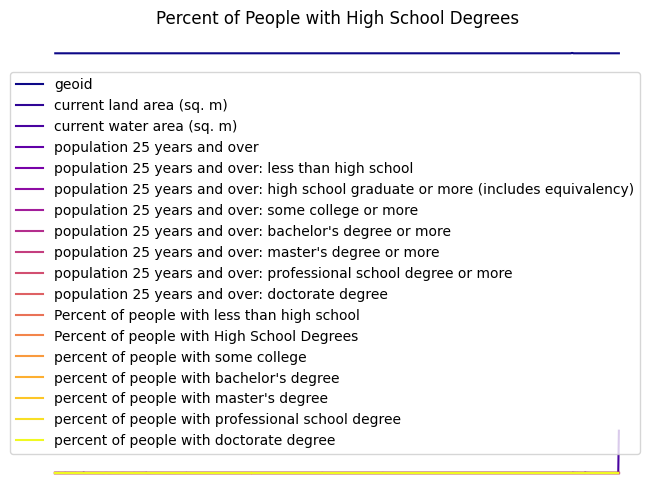

In [131]:
from shapely import wkt
#Converting df to gdf
#new_education['geometry'] = new_education['geometry'].apply(wkt.loads)
#new_education = gpd.GeoDataFrame(new_education, crs="EPSG:4326", geometry= new_education['geometry'])




fig, ax = plt.subplots(1, figsize=(8,6))
new_education.plot(column = 'High School Degrees per capita', legend = True, ax=ax, cmap='plasma')
ax.axis('off')
ax.set_title('Percent of People with High School Degrees', fontdict ={'fontsize': '12', 'fontweight' : '3'})

Text(0.5, 1.0, 'Population 25 Years and Over: Doctorate Degree')

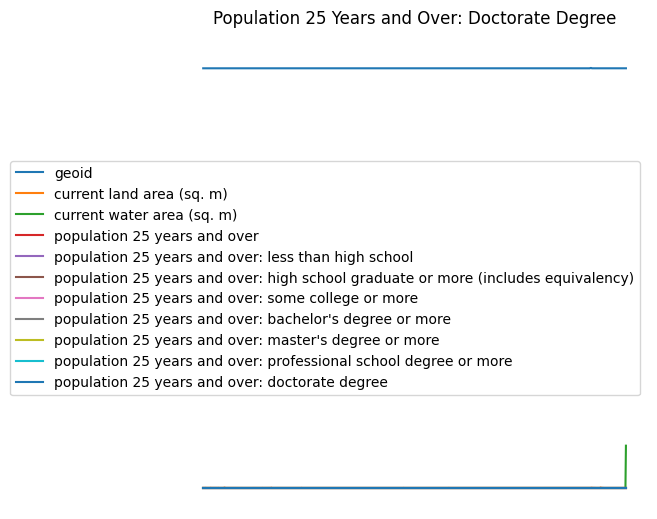

In [132]:
fig, ax = plt.subplots(1, figsize=(6,6))
education_demo.plot(column = 'population 25 years and over: doctorate degree', legend = True, ax=ax)
ax.axis('off')
ax.set_title('Population 25 Years and Over: Doctorate Degree', fontdict = {'fontsize': '12', 'fontweight' : '3'})

Text(0.5, 1.0, 'Population 25 Years and Over: High School Graduate or More (includes equivalency)')

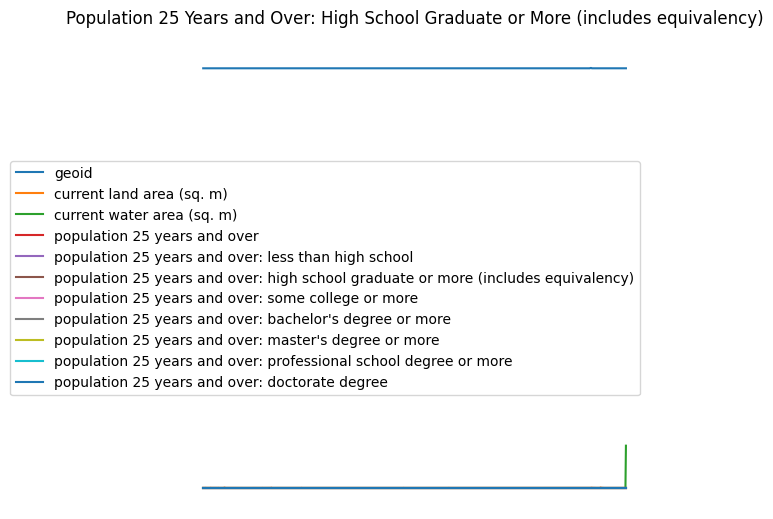

In [133]:
fig, ax = plt.subplots(1, figsize=(6,6))
education_demo.plot(column = 'population 25 years and over: high school graduate or more (includes equivalency)', legend = True, ax=ax)
ax.axis('off')
ax.set_title('Population 25 Years and Over: High School Graduate or More (includes equivalency)', fontdict = {'fontsize': '12', 'fontweight' : '3'})

Text(0.5, 1.0, "Population 25 Years and Over: Master's Degree or More")

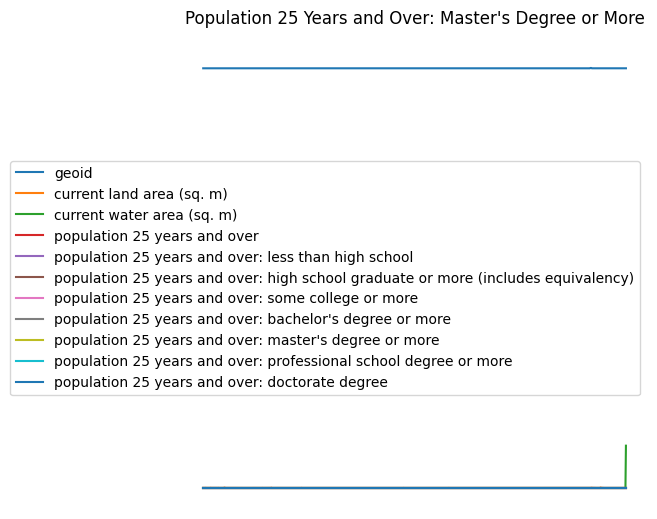

In [134]:
fig, ax = plt.subplots(1, figsize=(6,6))
education_demo.plot(column = 'population 25 years and over: master\'s degree or more', legend = True, ax=ax)
ax.axis('off')
ax.set_title('Population 25 Years and Over: Master\'s Degree or More', fontdict = {'fontsize': '12', 'fontweight' : '3'})

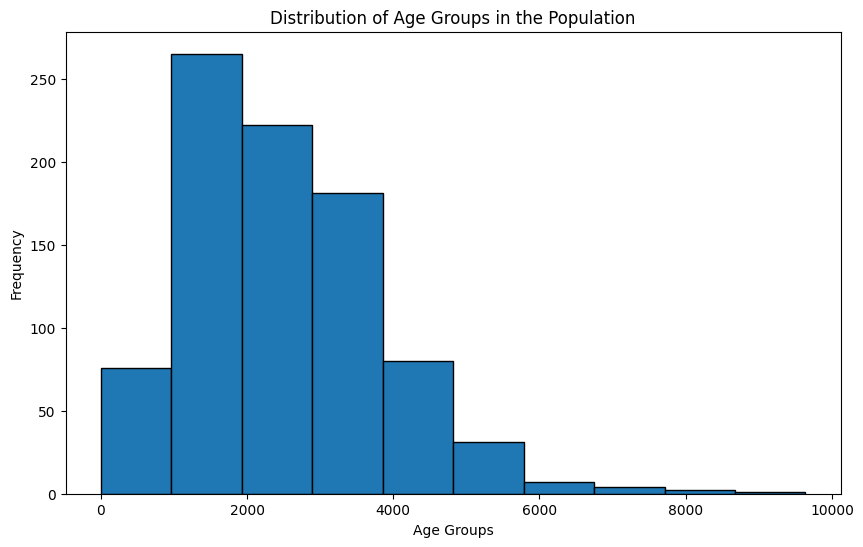

In [135]:
# Plotting the distribution of age groups
plt.figure(figsize=(10, 6))
plt.hist(education_demo['population 25 years and over'], bins=10, edgecolor='black')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.title('Distribution of Age Groups in the Population')
plt.show()


b.Is there a correlation between age distribution and educational attainment?



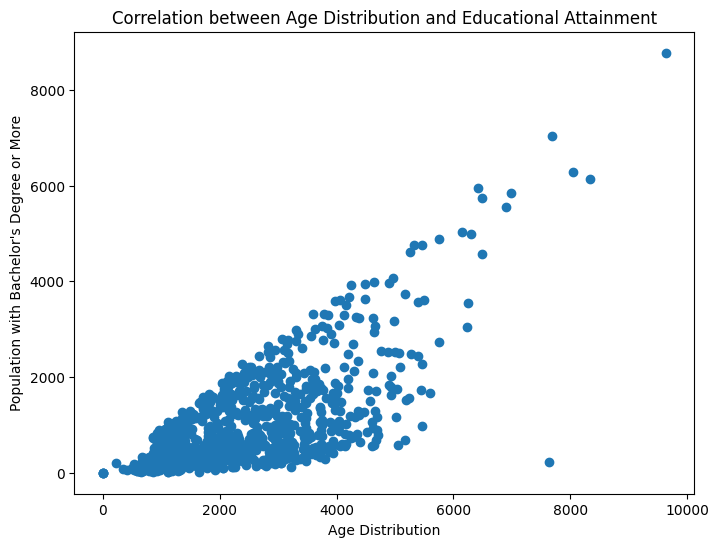

In [136]:
# Scatter plot of age distribution vs. population with bachelor's degree or more
plt.figure(figsize=(8, 6))
plt.scatter(education_demo['population 25 years and over'], education_demo["population 25 years and over: bachelor's degree or more"])
plt.xlabel('Age Distribution')
plt.ylabel('Population with Bachelor\'s Degree or More')
plt.title('Correlation between Age Distribution and Educational Attainment')
plt.show()


In [137]:
correlation = education_demo['population 25 years and over'].corr(education_demo["population 25 years and over: bachelor's degree or more"])
print("Correlation coefficient:", correlation)


Correlation coefficient: 0.6851909670768475
